# [CharacterTextSplitter](https://python.langchain.com/docs/how_to/character_text_splitter/)

- `단순하고 직관적`: 구현이 간단하고 작동 방식이 이해하기 쉽습니다.
- `빠른 처리`: 복잡한 로직 없이 단순히 지정된 문자를 기준으로 분할하므로 처리 속도가 빠릅니다.
- `명확한 분할 기준`: 특정 구분자를 명확하게 지정하여 분할할 수 있습니다 (예: 줄 바꿈, 마침표 등).

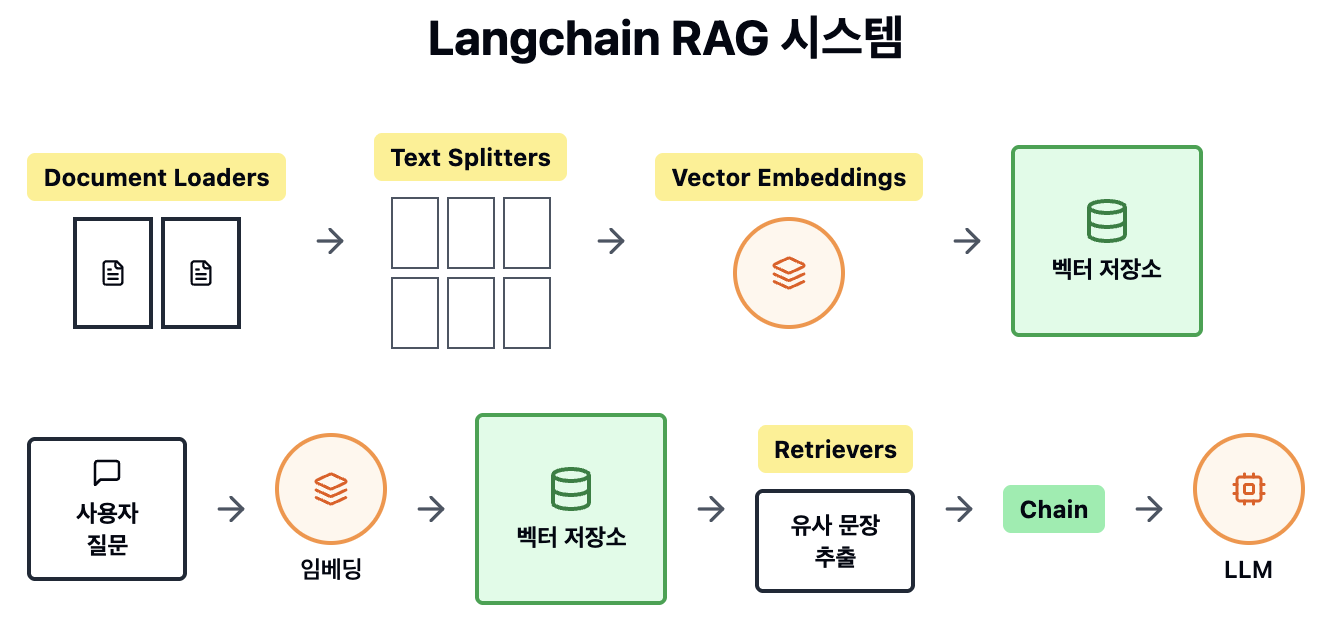

## Loader

In [1]:
from langchain_community.document_loaders import TextLoader

In [2]:
loader = TextLoader('./data/rag-keywords.txt', encoding='utf-8')

docs = loader.load()

In [3]:
print(f"문서의 수: {len(docs)}")

문서의 수: 1


In [4]:
# 문서의 메타데이터 확인 
docs[0].metadata

{'source': './data/rag-keywords.txt'}

In [5]:
# 문서 내용 확인 
print(docs[0].page_content[:300])

Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단


## Splitter

- 우선, 문서를 `\n\n`으로 `split`을 한다.
- `split 문서`가 `chunk_size`가 넘지 않으면 합쳐진다.
- `chunk_size`가 아무리 작아도 `\n\n`으로 짜른 단위가 `최소 chunk`가 된다.
- `chunk_overlap`의 기준은 글자 단위가 아니라 `\n\n`으로 짜른 문단 기준이 된다.

In [6]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    # 텍스트를 분할할 때 사용할 구분자를 지정합니다. 기본값은 "\n\n"입니다.
    separator="\n\n",
    # 분할된 텍스트 청크의 최대 크기를 지정합니다.
    chunk_size=250,
    # 분할된 텍스트 청크 간의 중복되는 문자 수를 지정합니다.
    chunk_overlap=50,
    # 텍스트의 길이를 계산하는 함수를 지정합니다.
    length_function=len,
    # 구분자가 정규식인지 여부를 지정합니다.
    is_separator_regex=False,
)

In [7]:
docs_with_splitter = text_splitter.split_documents(docs)

In [8]:
# splitter에 의해서 기존 문서 1개가 30개로 증가했습니다.
print(f"문서의 수: {len(docs_with_splitter)}")

문서의 수: 30


In [9]:
docs_with_splitter[0].metadata

{'source': './data/rag-keywords.txt'}

In [10]:
print(docs_with_splitter[0].page_content)

Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding


# [RecursiveCharacterTextSplitter](https://python.langchain.com/docs/how_to/recursive_text_splitter/)

- `문맥 보존 강화`: 여러 구분자를 계층적으로 사용하여 단락, 문장과 같은 자연스러운 텍스트 구조를 최대한 유지하면서 분할합니다. 이는 LLM이 청크 내의 의미를 더 잘 이해하는 데 도움이 됩니다.
- `유연하고 강력함`: 다양한 텍스트 구조에 대응할 수 있으며, 사용자가 정의한 구분자 목록을 통해 분할 전략을 세밀하게 제어할 수 있습니다.
- `정확한 청크 크기 제어`: 재귀적으로 분할을 시도하여 chunk_size를 더 효과적으로 준수하려고 노력합니다. 큰 청크가 생성되면 더 작은 구분자로 재분할하여 크기를 맞춥니다.

---
## CharacterTextSplitter vs RecursiveCharacterTextSplitter

| 특징         | `CharacterTextSplitter`                               | `RecursiveCharacterTextSplitter`                                 |
| :----------- | :---------------------------------------------------- | :--------------------------------------------------------------- |
| **분할 방식** | 단일 구분자 또는 단순히 문자 수 기반으로 분할       | 여러 구분자를 계층적으로(재귀적으로) 순차 적용하여 분할      |
| **문맥 보존** | 낮음 (문맥이 끊길 가능성 높음)                       | 높음 (단락, 문장 등 자연스러운 구조 유지 시도)                 |
| **유연성** | 낮음 (단순한 분할에 적합)                            | 높음 (복잡한 텍스트 구조에 대응 가능)                          |
| **성능** | 빠름                                                | 상대적으로 느릴 수 있음 (재귀적 처리)                         |
| **청크 크기** | 구분자에 따라 `chunk_size`보다 클 수 있음             | `chunk_size`를 더 잘 준수하려고 노력함                       |
| **적합한 상황** | 짧고 단순한 텍스트, 빠른 처리가 필요할 때              | 길고 복잡한 텍스트, 문맥 보존 및 LLM 성능 향상이 중요할 때 |

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    # 청크 크기를 매우 작게 설정합니다. 예시를 위한 설정입니다.
    chunk_size=250,
    # 청크 간의 중복되는 문자 수를 설정합니다.
    chunk_overlap=50,
    # 문자열 길이를 계산하는 함수를 지정합니다.
    length_function=len,
    # 구분자로 정규식을 사용할지 여부를 설정합니다.
    is_separator_regex=False,
)

In [12]:
docs_with_splitter = text_splitter.split_documents(docs)
print(f"문서의 수: {len(docs_with_splitter)}")

문서의 수: 30


In [13]:
docs_with_splitter[0].metadata

{'source': './data/rag-keywords.txt'}

In [14]:
print(docs_with_splitter[0].page_content)

Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding
